In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
random_state = 42
np.random.seed(random_state)

random_walk = np.cumsum(np.random.normal(loc=0, scale=1, size=1000))+ 50
df = pd.DataFrame(random_walk, columns=['value'])

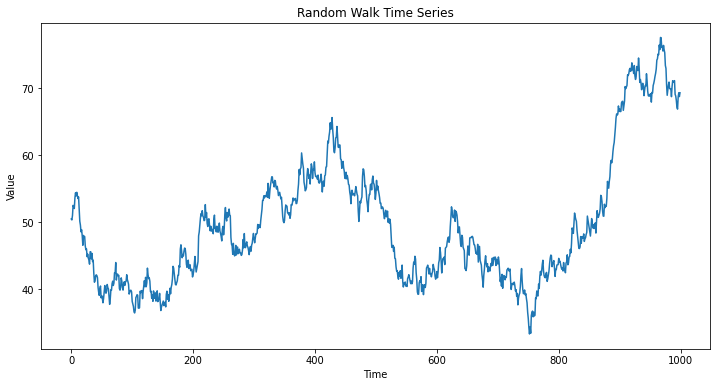

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['value'])
plt.title('Random Walk Time Series')
plt.xlabel('Time')  
plt.ylabel('Value')
plt.show()

In [25]:
ADF_result = adfuller(df["value"])
#print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

p-value: 0.7654789696692581


El p-valor es alto, por tanto no rechazamos la hipótesis nula de que la serie tiene una raíz unitaria. La serie no es estacionaria, requiere ser diferenciada.

--Exploracion de series en general--

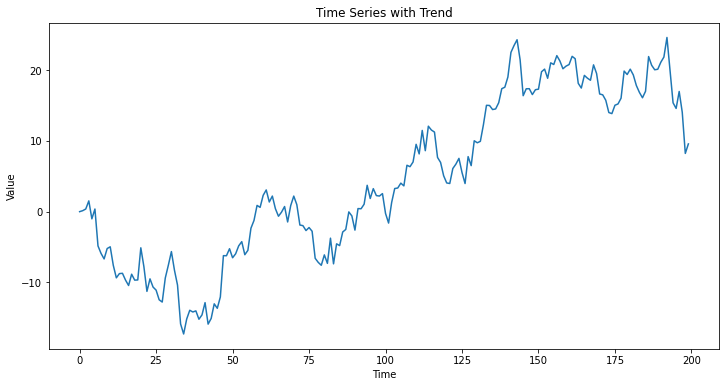

In [21]:
n = 200
#phis = [0.5, -0.3, 0.2]
phis = [1]
c = 0.2
errors = np.random.normal(0, 2, n)
x = np.zeros(n)
q = len(phis)
for t in range(q, n):
    x[t] = c + np.dot(phis, x[t-q:t][::-1]) + errors[t]
   
  
   

df = pd.DataFrame(x, columns=['value'])
plt.figure(figsize=(12, 6))
plt.plot(df['value'])
plt.title('Time Series with Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()